In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
cols = ["N", "P", "K", "temp", "humidity", "ph", "rainfall", "class"]
df = pd.read_csv("data.csv", names=cols)
df = df.iloc[1:].reset_index(drop=True)
df.head()

,N,P,K,temp,humidity,ph,rainfall,class
0,90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice
1,85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice
2,60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice
3,74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice
4,78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['class_encoded'] = le.fit_transform(df['class'])

df.head()


,N,P,K,temp,humidity,ph,rainfall,class,class_encoded
0,90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice,20
1,85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice,20
2,60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice,20
3,74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice,20
4,78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice,20


In [4]:
class_mapping = {i: class_name for i, class_name in enumerate(le.classes_)}
df = df.drop(columns=['class']).rename(columns={'class_encoded': 'class'})

print(df.head())
print("Class Mapping:", class_mapping)

    N   P   K         temp     humidity                 ph     rainfall  class
0  90  42  43  20.87974371  82.00274423  6.502985292000001  202.9355362     20
1  85  58  41  21.77046169  80.31964408        7.038096361  226.6555374     20
2  60  55  44  23.00445915   82.3207629        7.840207144  263.9642476     20
3  74  35  40  26.49109635  80.15836264        6.980400905  242.8640342     20
4  78  42  42  20.13017482  81.60487287        7.628472891  262.7173405     20
Class Mapping: {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


In [5]:
print("Class distribution before split:")
print(df['class'].value_counts())

Class distribution before split:
class
20    100
11    100
3     100
9     100
18    100
13    100
14    100
2     100
10    100
19    100
1     100
12    100
7     100
21    100
15    100
0     100
16    100
17    100
4     100
6     100
8     100
5     100
Name: count, dtype: int64


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,
    random_state=42,
    stratify=y_temp
)

In [8]:
def scale_dataset(X, y, oversample=False):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_scaled, y)
        return X_resampled, y_resampled

    return X_scaled, y

In [9]:
X_train_scaled, y_train_resampled = scale_dataset(X_train, y_train, oversample=True)
X_val_scaled, y_val = scale_dataset(X_val, y_val, oversample=False)
X_test_scaled, y_test = scale_dataset(X_test, y_test, oversample=False)

c:\Users\APEX\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\APEX\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\APEX\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [10]:
print("\nClass distribution in training set after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

print("\nDataset shapes:")
print(f"Training: {X_train_scaled.shape}")
print(f"Validation: {X_val_scaled.shape}")
print(f"Test: {X_test_scaled.shape}")


Class distribution in training set after oversampling:
class
17    60
14    60
8     60
0     60
11    60
7     60
20    60
2     60
18    60
16    60
4     60
21    60
12    60
3     60
1     60
13    60
19    60
5     60
6     60
9     60
15    60
10    60
Name: count, dtype: int64

Dataset shapes:
Training: (1320, 7)
Validation: (440, 7)
Test: (440, 7)


In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [12]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\APEX\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │         1,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,710 (41.84 KB)

 Trainable params: 10,710 (41.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0768 - loss: 3.0351 - val_accuracy: 0.2955 - val_loss: 2.7644
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2507 - loss: 2.7214 - val_accuracy: 0.5273 - val_loss: 2.3977
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4220 - loss: 2.3600 - val_accuracy: 0.6023 - val_loss: 1.9715
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5214 - loss: 1.9410 - val_accuracy: 0.7159 - val_loss: 1.5568
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5985 - loss: 1.5852 - val_accuracy: 0.7818 - val_loss: 1.2058
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6443 - loss: 1.3125 - val_accuracy: 0.8295 - val_loss: 0.9560
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7032 - loss: 1.0922 - val_accuracy: 0.8591 - val_loss: 0.7771
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7340 - loss: 0.9403 - val_accuracy: 0.8614 - v

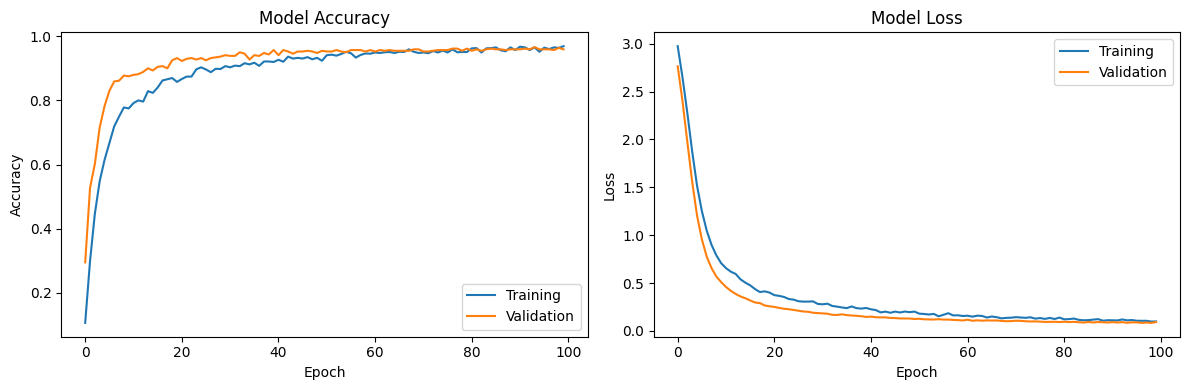

In [18]:
plot_history(history)

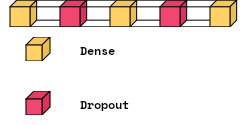

In [20]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("SpaceMono-Bold.ttf", size=12)
visualkeras.layered_view(nn_model, legend=True, spacing=30, font=font)